In [52]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [53]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Result = cwd + "\\ResultsPRISMA"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [54]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_PRISMA)]:
    item = item + "_StackedIndices"
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i_StackedIndices',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_StackedIndices']

In [55]:
df_Raster_6 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[0] + "\\AlphaDiversity300m.csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[1] + "\\AlphaDiversity300m.csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson,FRic,FEve,FDiv
0,FOR01,6.20,0,1.492069,0.723424,87.846583,0.589504,0.665068
1,FOR02,3.70,0,1.282322,0.712500,264.306867,0.584170,0.617671
2,FOR03,2.00,0,0.693147,0.500000,270.838222,0.610798,0.645962
3,FOR04,9.35,0,2.006747,0.843171,378.495483,0.598815,0.626151
4,FOR05,4.90,0,1.382070,0.709308,529.987579,0.564434,0.654966


In [56]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,6.20,1.492069,0.723424,6.80,1.595564,0.758223
1,FOR02,3.70,1.282322,0.712500,3.00,0.695693,0.403025
2,FOR03,2.00,0.693147,0.500000,2.15,0.476852,0.291837
3,FOR04,9.35,2.006747,0.843171,9.35,1.896759,0.808111
4,FOR05,4.90,1.382070,0.709308,3.35,1.014768,0.589139


In [57]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,6.20,1.492069,0.723424,6.80,1.595564,0.758223
1,FOR02,3.70,1.282322,0.712500,3.00,0.695693,0.403025
2,FOR03,2.00,0.693147,0.500000,2.15,0.476852,0.291837
3,FOR04,9.35,2.006747,0.843171,9.35,1.896759,0.808111
4,FOR05,4.90,1.382070,0.709308,3.35,1.014768,0.589139


In [58]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [59]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,6.15,1.538060,0.741699,3.3,0.924072,0.550500,Prunus
59,FOR79,7.90,1.507998,0.692646,6.7,1.477469,0.698634,Mixed deciduous
60,FOR80,4.90,1.219051,0.645989,3.4,1.057834,0.609343,Mixed deciduous
61,FOR81,8.85,1.850224,0.804972,10.3,2.042581,0.841549,Mixed deciduous
62,FOR82,8.75,1.681919,0.734834,8.9,1.840843,0.809530,Mixed deciduous


## Species Richness

In [60]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [61]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [62]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,6.20,6.80
1,FOR02,7,Prunus,3.70,3.00
2,FOR03,4,Prunus,2.00,2.15
3,FOR04,2,Oak_open_canopy,9.35,9.35
4,FOR05,1,Oak_open_canopy,4.90,3.35


In [63]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,6.585714,5.606349
std,1.865415,2.016253,1.897845
min,1.000000,2.000000,1.000000
25%,2.000000,5.175000,4.225000
50%,3.000000,6.250000,5.600000
75%,4.000000,7.800000,6.850000
max,8.000000,11.850000,10.300000


In [64]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,5.85,5.45
19,FOR20,3,Alder,5.20,4.25
35,FOR55,2,Alder,6.25,4.95
7,FOR08,4,Alder,11.45,8.95
36,FOR56,2,Alder,6.25,4.20
...,...,...,...,...,...
24,FOR25,1,Pine,8.80,5.60
30,FOR31,2,Pine,6.05,7.15
58,FOR78,2,Prunus,6.15,3.30
2,FOR03,4,Prunus,2.00,2.15


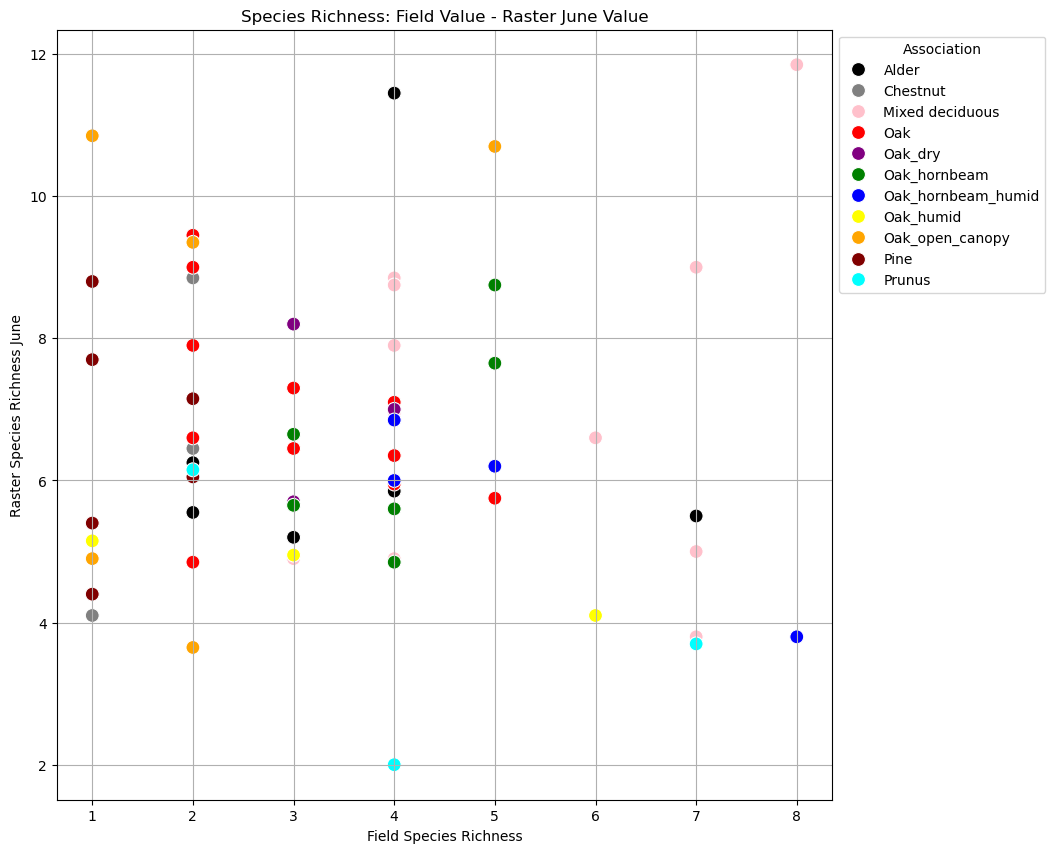

In [65]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

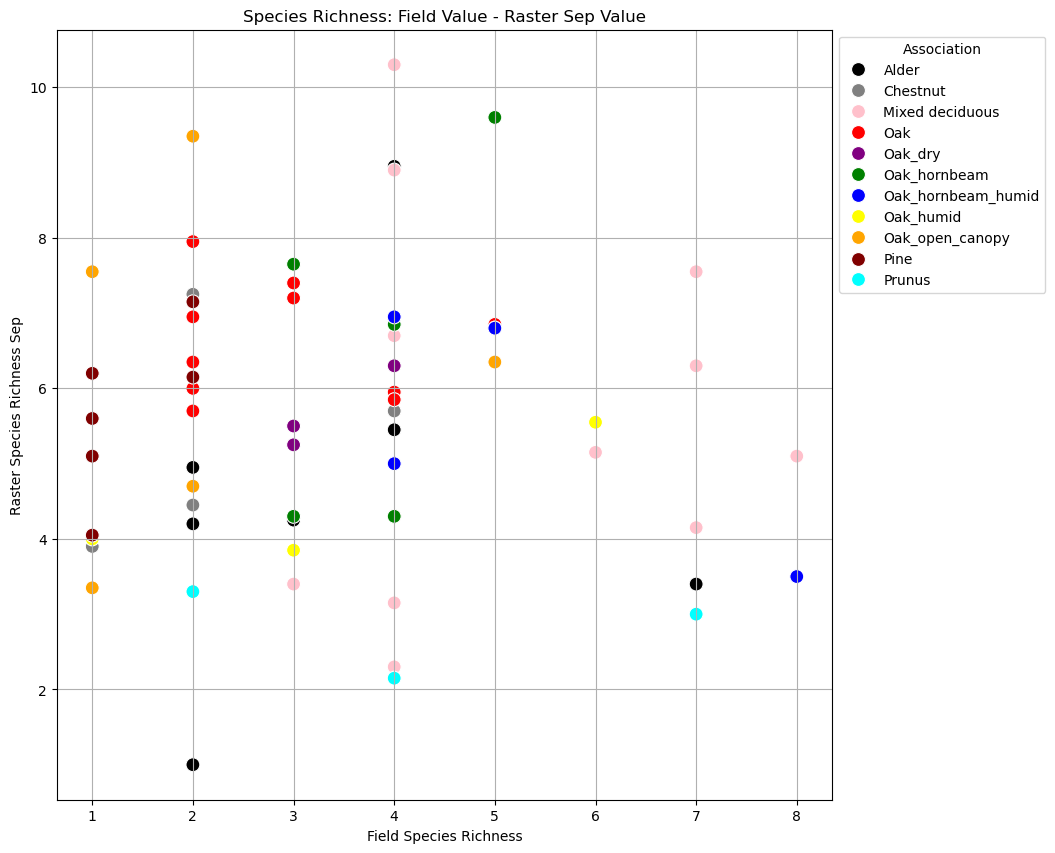

In [66]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

In [67]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-8.893576368175674
5.869202582281191e-15
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to -0.03298947240788605
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [68]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

-4.005700412007063

In [69]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

3.6523809523809523

In [70]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-6.258868606440709
5.777677823663739e-09
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.0011245064673289923
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [71]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-2.3186010153031202

In [72]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

2.9

## Shannon

In [73]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [74]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [75]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,1.538060,0.924072
59,FOR79,1.344339,Mixed deciduous,1.507998,1.477469
60,FOR80,0.918320,Mixed deciduous,1.219051,1.057834
61,FOR81,1.301362,Mixed deciduous,1.850224,2.042581
62,FOR82,1.193337,Mixed deciduous,1.681919,1.840843


In [76]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,1.993590,1.510219
30,FOR31,0.146145,Pine,1.260028,1.331880
58,FOR78,0.286836,Prunus,1.538060,0.924072
2,FOR03,0.534923,Prunus,0.693147,0.476852
1,FOR02,1.604816,Prunus,1.282322,0.695693


In [77]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
20,FOR21,0.942002,Alder,1.280282,1.164044
19,FOR20,0.886464,Alder,1.233906,0.961136
35,FOR55,0.276191,Alder,1.367467,1.274328
7,FOR08,0.804448,Alder,1.983754,1.470476
36,FOR56,0.482578,Alder,1.345405,1.159840


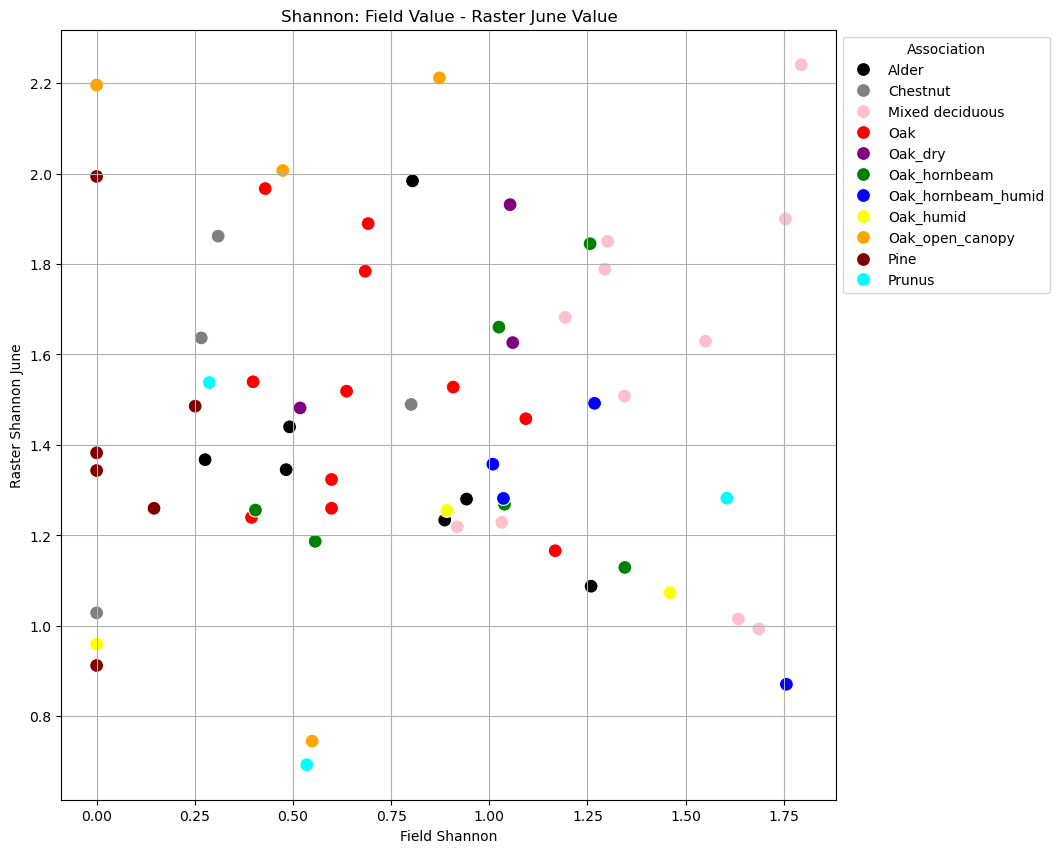

In [78]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [79]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-7.210224818934948
8.030134855642126e-11
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to -0.017838465391237436
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [80]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-2.08987634611066

In [81]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.7645264639910625

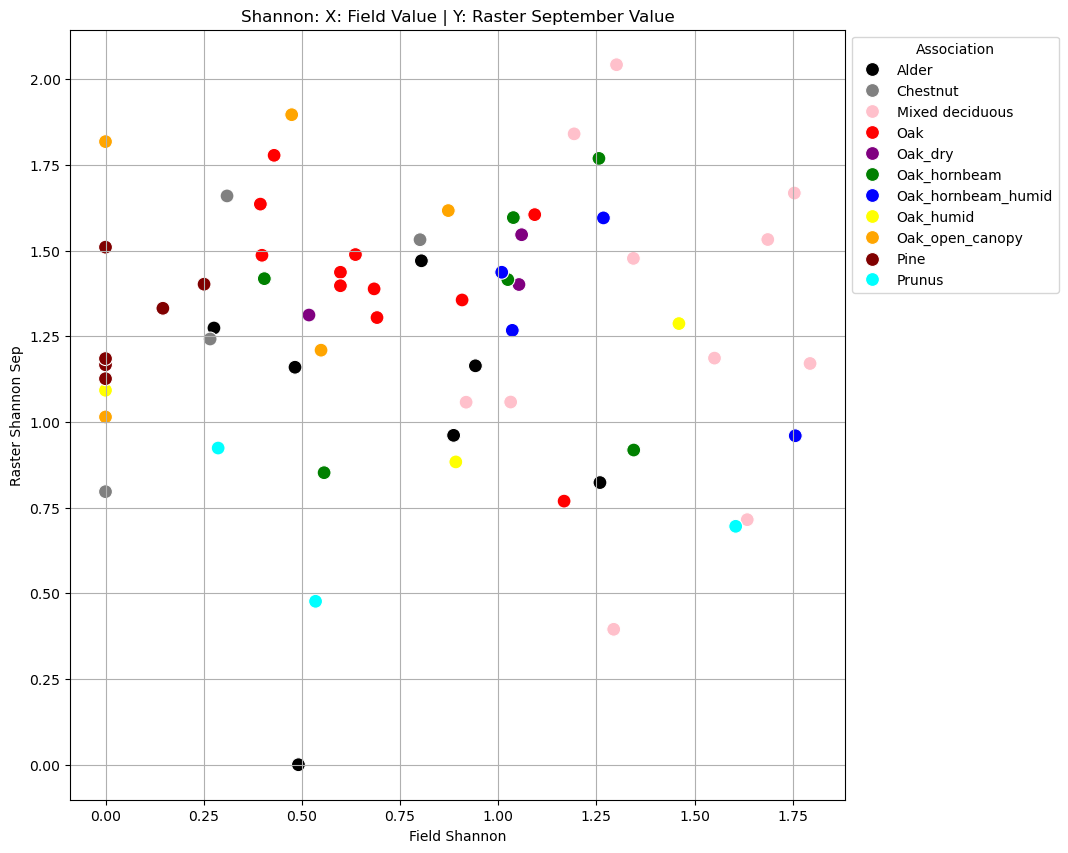

In [82]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [83]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-4.580722219429474
1.2482129602461482e-05
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to -0.06878309376464292
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [84]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-1.4188872246672624

In [85]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.6900624846093977